In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df = pd.read_csv('tripadvisor_european_restaurants.csv')

In [3]:
df

,Unnamed: 0,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,0,0,1354,235,0,9,36,255,168,987,...,2,0,0,0,0,5,6,5,9,24
1,1,1,1815,235,0,9,36,255,564,986,...,2,2,1,0,0,8,8,8,9,24
2,2,2,82,96,0,3,10,223,836,1052,...,3,1,0,0,0,8,8,8,9,24
3,3,3,1778,217,0,9,15,113,2163,922,...,1,0,0,0,0,6,6,6,9,24
4,4,4,2369,257,0,10,7,256,2837,442,...,4,7,0,0,0,6,6,6,9,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,2995,1710,273,0,10,40,296,936,158,...,6,2,0,0,2,3,4,3,4,24
2996,2996,2996,1453,273,0,10,40,296,786,146,...,21,15,6,3,13,4,4,3,9,24
2997,2997,2997,1550,273,0,10,40,296,972,145,...,1,0,0,0,0,8,8,8,9,24
2998,2998,2998,1466,273,0,10,40,296,1347,140,...,2,2,0,0,0,5,6,5,8,24


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Unnamed: 0                         3000 non-null   int64
 1   restaurant_link                    3000 non-null   int64
 2   restaurant_name                    3000 non-null   int64
 3   original_location                  3000 non-null   int64
 4   country                            3000 non-null   int64
 5   region                             3000 non-null   int64
 6   province                           3000 non-null   int64
 7   city                               3000 non-null   int64
 8   address                            3000 non-null   int64
 9   latitude                           3000 non-null   int64
 10  longitude                          3000 non-null   int64
 11  claimed                            3000 non-null   int64
 12  awards              

In [5]:
df.avg_rating

0       6
1       6
2       8
3       6
4       7
       ..
2995    4
2996    5
2997    7
2998    6
2999    7
Name: avg_rating, Length: 3000, dtype: int64

In [6]:
df.avg_rating.max()

9

In [7]:
df.avg_rating.min()

0

In [8]:
bin_edges = [0, 5.0, 10.0] 
bin_labels = ['bad', 'good']

df['new_avg_rating']= pd.cut(df['avg_rating'], bins=bin_edges, labels=bin_labels, right=False)

In [9]:
df['new_avg_rating'].value_counts()

good    2594
bad      406
Name: new_avg_rating, dtype: int64

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['new_avg_rating'] = le.fit_transform(df['new_avg_rating'])

In [11]:
df.head(2)

,Unnamed: 0,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,...,very_good,average,poor,terrible,food,service,value,atmosphere,keywords,new_avg_rating
0,0,0,1354,235,0,9,36,255,168,987,...,0,0,0,0,5,6,5,9,24,1
1,1,1,1815,235,0,9,36,255,564,986,...,2,1,0,0,8,8,8,9,24,1


In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

<Axes: >

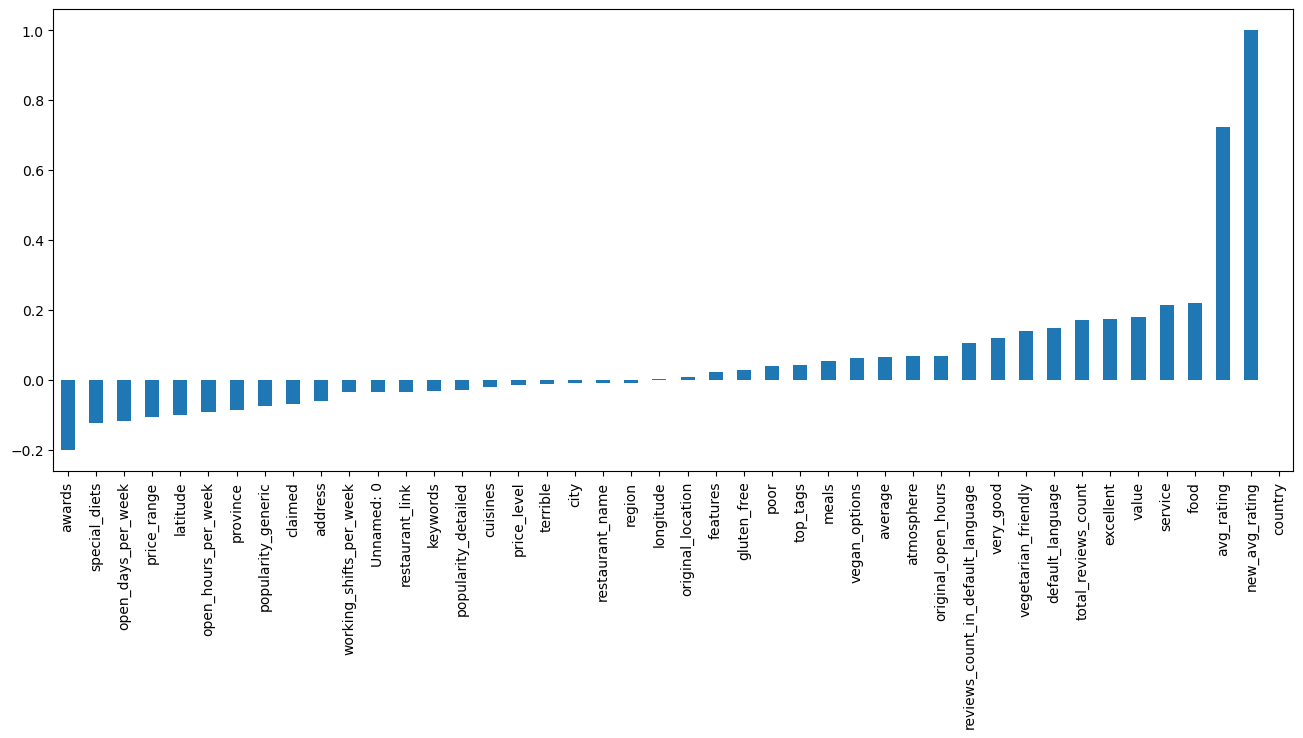

In [13]:
df.corrwith(df['new_avg_rating']).sort_values(ascending=True).plot(kind='bar',figsize=(16, 6))

In [14]:
df  = df.drop(columns='region')
df  = df.drop(columns='country')

<Axes: >

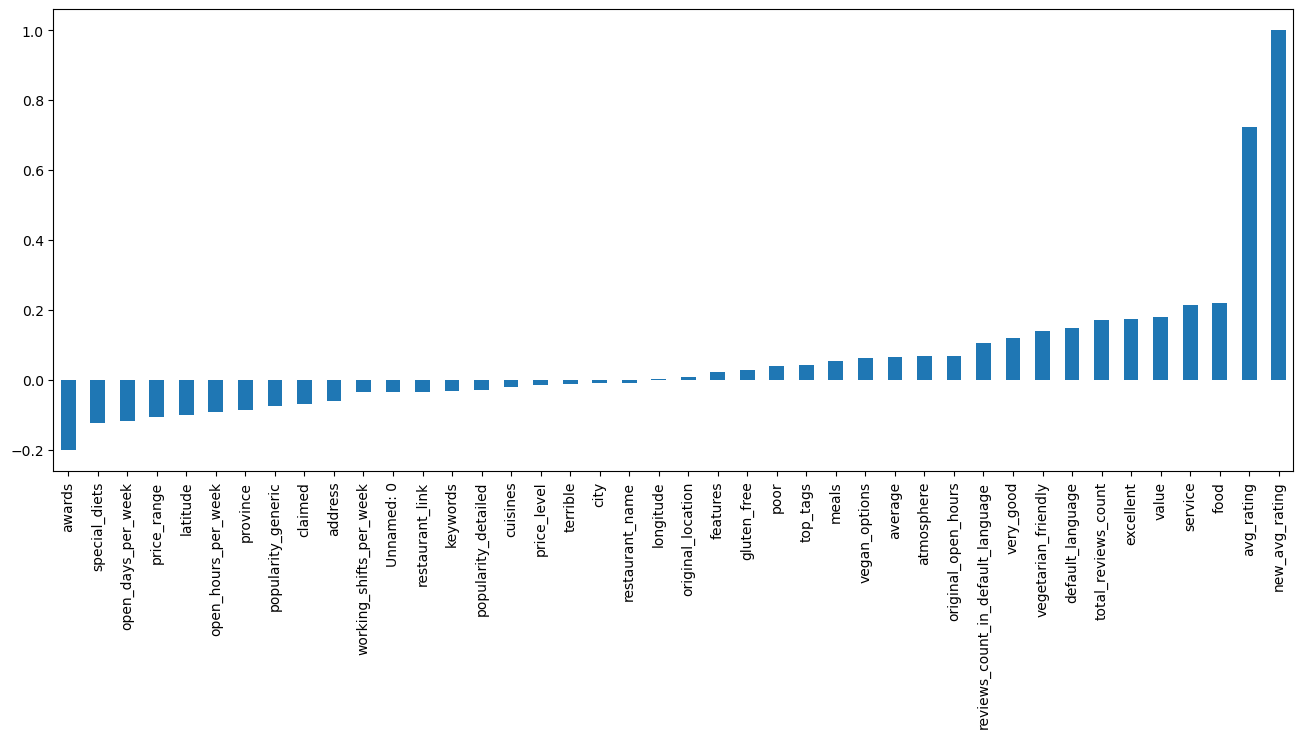

In [15]:
df.corrwith(df['new_avg_rating']).sort_values(ascending=True).plot(kind='bar',figsize=(16, 6))

In [16]:
df

,Unnamed: 0,restaurant_link,restaurant_name,original_location,province,city,address,latitude,longitude,claimed,...,very_good,average,poor,terrible,food,service,value,atmosphere,keywords,new_avg_rating
0,0,0,1354,235,36,255,168,987,766,0,...,0,0,0,0,5,6,5,9,24,1
1,1,1,1815,235,36,255,564,986,781,1,...,2,1,0,0,8,8,8,9,24,1
2,2,2,82,96,10,223,836,1052,848,0,...,1,0,0,0,8,8,8,9,24,1
3,3,3,1778,217,15,113,2163,922,984,0,...,0,0,0,0,6,6,6,9,24,1
4,4,4,2369,257,7,256,2837,442,1928,1,...,7,0,0,0,6,6,6,9,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,2995,1710,273,40,296,936,158,2115,1,...,2,0,0,2,3,4,3,4,24,0
2996,2996,2996,1453,273,40,296,786,146,2129,0,...,15,6,3,13,4,4,3,9,24,1
2997,2997,2997,1550,273,40,296,972,145,2112,0,...,0,0,0,0,8,8,8,9,24,1
2998,2998,2998,1466,273,40,296,1347,140,2104,0,...,2,0,0,0,5,6,5,8,24,1


In [17]:
X = df[df.columns[1:]]
y = df['new_avg_rating']

[[ 37   0]
 [  0 263]]


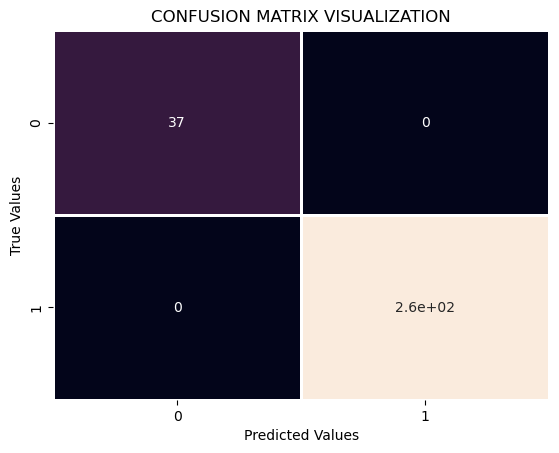

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

model1 = DecisionTreeClassifier()

model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)


conf = confusion_matrix(y_test,y_pred)
print(conf)
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()

In [19]:
acc = accuracy_score(y_test,y_pred)
print(acc)


1.0


In [20]:
res = classification_report(y_test,y_pred)
print(res)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00       263

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [21]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

1.0

In [22]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

1.0

In [23]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

1.0

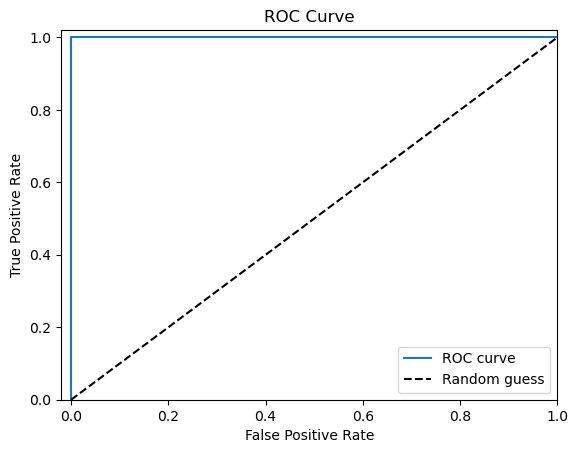

In [24]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_pred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")